<a href="https://colab.research.google.com/github/olexandr7/erm_visitation_analysis/blob/main/ERM_tickets_data_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

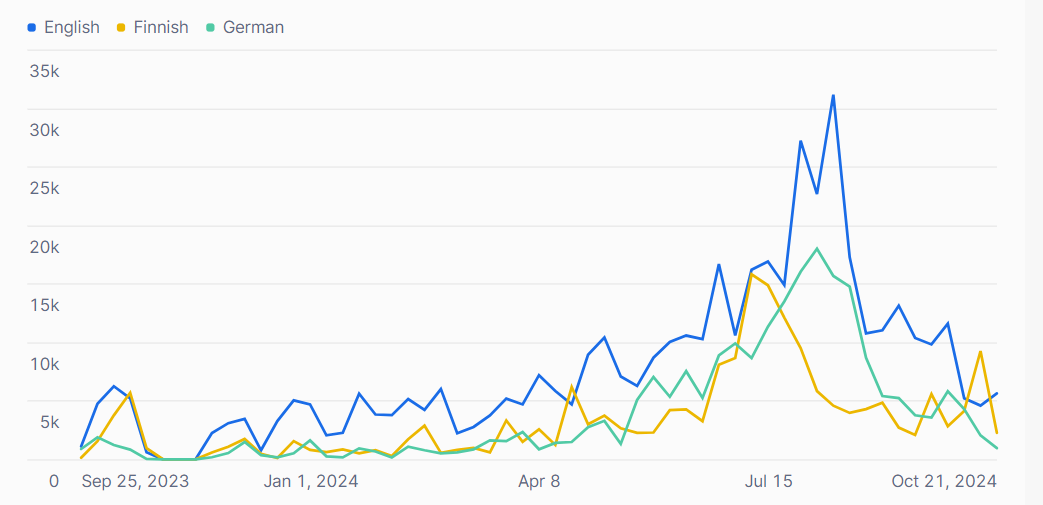

In [ ]:
/*Data - one year - 2024*/
--------------------------------------------------------
--creatig table with parsed timestamps
create or replace table erm.public.logs
AS select
device_id,
ticket_info,
ticket_id,
TO_TIMESTAMP(timestamp) as timestamp
from erm.public.logs_raw;
--------------------------------------------------------
--Language mapping
CREATE OR REPLACE TABLE erm.public.language_mapping (
    id INTEGER PRIMARY KEY,
    name VARCHAR(50)
);

-- Insert the data
INSERT INTO erm.public.language_mapping (id, name) VALUES
(1, 'Estonian'),
(2, 'Russian'),
(3, 'English'),
(4, 'Finnish'),
(5, 'French'),
(6, 'Latvian'),
(7, 'German');
--------------------------------------------------------
--combining with mapping table
create or replace table erm.public.logs_enriched as
select
lg.device_id,
mp.topic,
lg.ticket_info,
CAST(SUBSTR(lg.ticket_info, 1, 2) AS INTEGER) AS language_id,
lm.name as language_name,
lg.ticket_id,
lg.timestamp
from erm.public.logs lg
LEFT JOIN erm.public.topic_mapping mp
on lg.device_id = mp.device_id
left join erm.public.language_mapping lm
on language_id = lm.id;
--------------------------------------------------------
--Enriched data
select * from erm.public.logs_enriched limit 100;
--------------------------------------------------------
--Analytical queries
--------------------------------------------------------
--Popularity of topics
SELECT
    topic,
    COUNT(*) AS logs_count
FROM erm.public.logs_enriched
GROUP BY 1
ORDER BY 2 desc;
----------------------
--Visits by day of week
SELECT
    DAYNAME(TO_DATE(timestamp)) AS day,
    COUNT(*) AS logs_count
FROM erm.public.logs_enriched
GROUP BY 1
ORDER BY 2 desc;
----------------------
--top 3 most popular exhibitions/topics over the year
SELECT * from erm.public.logs_enriched
where topic IN
(
SELECT topic from
    (
    SELECT
        topic,
        COUNT(*) AS logs_count
    FROM erm.public.logs_enriched
    GROUP BY 1
    ORDER BY 2 desc
    LIMIT 3 --top 3 most popular exhibitions/topics
    )
);
----------------------
--top 3 most popular languages over the year
SELECT * from erm.public.logs_enriched
where language_id IN
(
SELECT language_id from
    (
    SELECT
        language_id,
        COUNT(*) AS logs_count
    FROM erm.public.logs_enriched
    GROUP BY 1
    ORDER BY 2 desc
    LIMIT 3 --top 3 most popular exhibitions/topics
    )
);
